# Análisis de Collections

#### Seccion 1: Modelo de Collections

Sheets disponibles: ['Contactibility']

Primeras filas del dataset:
   customer_id  contactability_score
0            1                 0.293
1            2                 0.250
2            3                 0.033
3            4                 0.239
4            5                 0.681

Dimensiones: (675, 2)
Columnas: ['customer_id', 'contactability_score']

=== ANÁLISIS DE CONTACTABILITY SCORES ===
Total de clientes DQ: 675
Score promedio: 0.419
Score mediano: 0.378
Score mínimo: 0.001
Score máximo: 0.999


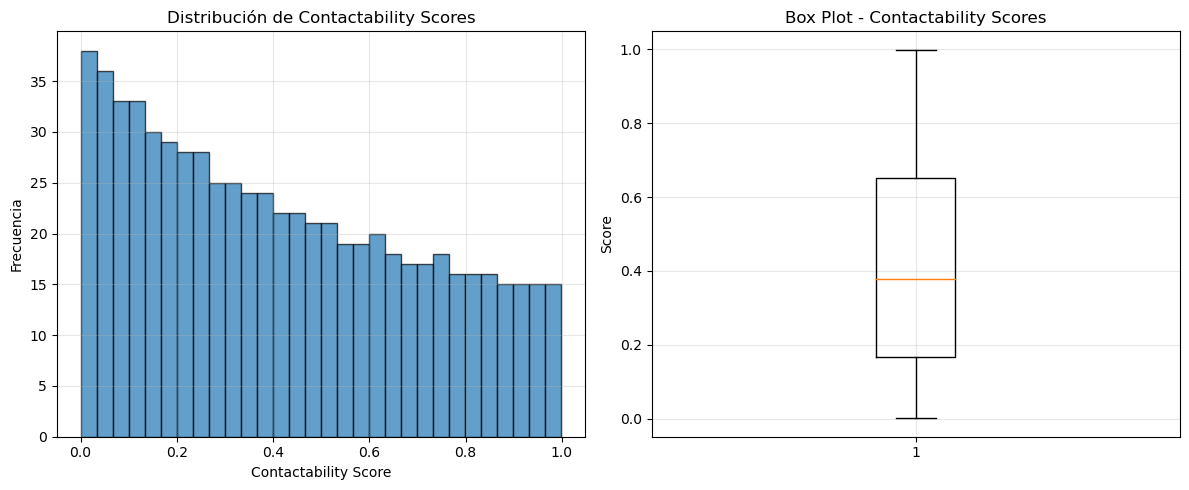


=== PARÁMETROS DEL PROBLEMA ===
Contigo A - Situación inicial:
• Total clientes: 5,000
• DQ rate actual: 13.5% (675 clientes)
• Meta DQ rate: 10% (500 clientes)
• Necesitamos recuperar: 175+ clientes
• Costo por llamada: $30
• Probabilidad de pago si contactamos: 75%
• Probabilidad de pago si NO contactamos: 0%

=== SIMULACIÓN DE CAMPAÑA ===

=== RESULTADOS DE LA CAMPAÑA ===
1. Cuentas recuperadas: 281 de 675
2. Deuda total recuperada: $323,150
3. Revenue de intereses: $42,150
4. Costo total campaña: $20,250
5. Losses restantes: $394,000
6. Collections income: $302,900

Tasa de éxito: 41.6%
ROI de campaña: 14.96
Meta alcanzada: ✅ SÍ

=== IMPACTO EN EL NEGOCIO ===
Sin campaña (Tabla 1 del caso):
• Net income: -$176,250
• DQ losses: $675,000
• Interest revenue: $648,750

Con campaña:
• Reducción en losses: $281,000
• Aumento en revenue: $42,150
• Costo de campaña: $20,250
• Net income estimado: $126,650


In [56]:
# Análisis de Collections - Parte 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Leer el archivo Excel (ajusta la ruta según tu máquina)
archivo_excel = 'BA Hiring - Collections Challenge Excel (4) (3) (1) (3) (2) (3) (1) (1).xlsx'

# Leer el archivo - puede estar en diferentes sheets
try:
    # Primero ver qué sheets tiene el archivo
    excel_file = pd.ExcelFile(archivo_excel)
    print("Sheets disponibles:", excel_file.sheet_names)
    
    # Leer la primera sheet o la que tenga los contactability scores
    df_scores = pd.read_excel(archivo_excel, sheet_name=0)  # Cambiar sheet_name si es necesario
    print("\nPrimeras filas del dataset:")
    print(df_scores.head())
    print(f"\nDimensiones: {df_scores.shape}")
    print(f"Columnas: {df_scores.columns.tolist()}")
    
except FileNotFoundError:
    print("Archivo no encontrado. Asegúrate de que la ruta sea correcta.")
    print("Cambia la variable 'archivo_excel' por la ruta correcta del archivo.")
    df_scores = None

# Si el archivo se cargó correctamente, continuar con el análisis
if df_scores is not None:
    
    # Análisis exploratorio de los contactability scores
    print(f"\n=== ANÁLISIS DE CONTACTABILITY SCORES ===")
    
    # Verificar si las columnas son 'customer_id' y 'contactability_score'
    if 'customer_id' in df_scores.columns and 'contactability_score' in df_scores.columns:
        print(f"Total de clientes DQ: {len(df_scores)}")
        print(f"Score promedio: {df_scores['contactability_score'].mean():.3f}")
        print(f"Score mediano: {df_scores['contactability_score'].median():.3f}")
        print(f"Score mínimo: {df_scores['contactability_score'].min():.3f}")
        print(f"Score máximo: {df_scores['contactability_score'].max():.3f}")
        
        # Distribución de scores
        plt.figure(figsize=(12, 5))
        
        plt.subplot(1, 2, 1)
        plt.hist(df_scores['contactability_score'], bins=30, alpha=0.7, edgecolor='black')
        plt.title('Distribución de Contactability Scores')
        plt.xlabel('Contactability Score')
        plt.ylabel('Frecuencia')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.boxplot(df_scores['contactability_score'])
        plt.title('Box Plot - Contactability Scores')
        plt.ylabel('Score')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
    else:
        print("Columnas encontradas no son las esperadas ('customer_id', 'contactability_score')")
        print("Por favor verifica el contenido del archivo")

# Parámetros del problema de collections
print(f"\n=== PARÁMETROS DEL PROBLEMA ===")
print("Contigo A - Situación inicial:")
print("• Total clientes: 5,000")
print("• DQ rate actual: 13.5% (675 clientes)")
print("• Meta DQ rate: 10% (500 clientes)")
print("• Necesitamos recuperar: 175+ clientes")
print("• Costo por llamada: $30")
print("• Probabilidad de pago si contactamos: 75%")
print("• Probabilidad de pago si NO contactamos: 0%")

# Modelo de Collections (extensión de nuestras clases)
class CampaignCollections:
    def __init__(self, df_scores, costo_por_llamada=30, prob_pago_contactado=0.75):
        self.df_scores = df_scores.copy()
        self.costo_por_llamada = costo_por_llamada
        self.prob_pago_contactado = prob_pago_contactado
        self.resultados = None
        
    def simular_campana_completa(self, monto_deuda=1150):  # $1000 + 15% interés
        """
        Simula llamar a TODOS los 675 clientes DQ
        """
        if self.df_scores is None:
            print("No hay datos de scores disponibles")
            return None
            
        df_sim = self.df_scores.copy()
        
        # Para cada cliente: simular contacto y pago
        df_sim['contactado'] = np.random.binomial(1, df_sim['contactability_score'])
        df_sim['paga'] = df_sim['contactado'] * np.random.binomial(1, self.prob_pago_contactado)
        
        # Cálculos de KPIs
        total_clientes_dq = len(df_sim)
        cuentas_recuperadas = df_sim['paga'].sum()
        deuda_recuperada = cuentas_recuperadas * monto_deuda
        revenue_intereses = cuentas_recuperadas * 1000 * 0.15  # Solo interés es revenue
        costo_campana = total_clientes_dq * self.costo_por_llamada
        cuentas_no_recuperadas = total_clientes_dq - cuentas_recuperadas
        losses_restantes = cuentas_no_recuperadas * 1000  # Solo capital es loss
        collections_income = deuda_recuperada - costo_campana
        
        resultados = {
            'total_dq_clientes': total_clientes_dq,
            'cuentas_recuperadas': cuentas_recuperadas,
            'deuda_recuperada': deuda_recuperada,
            'revenue_intereses': revenue_intereses,
            'costo_campana': costo_campana,
            'cuentas_no_recuperadas': cuentas_no_recuperadas,
            'losses_restantes': losses_restantes,
            'collections_income': collections_income,
            'tasa_exito': cuentas_recuperadas / total_clientes_dq,
            'roi_campana': collections_income / costo_campana if costo_campana > 0 else 0
        }
        
        self.resultados = resultados
        
        return df_sim, resultados
    
    def mostrar_resultados(self):
        if self.resultados is None:
            print("No hay resultados. Ejecuta primero simular_campana_completa()")
            return
            
        r = self.resultados
        print(f"\n=== RESULTADOS DE LA CAMPAÑA ===")
        print(f"1. Cuentas recuperadas: {r['cuentas_recuperadas']:,} de {r['total_dq_clientes']:,}")
        print(f"2. Deuda total recuperada: ${r['deuda_recuperada']:,.0f}")
        print(f"3. Revenue de intereses: ${r['revenue_intereses']:,.0f}")
        print(f"4. Costo total campaña: ${r['costo_campana']:,.0f}")
        print(f"5. Losses restantes: ${r['losses_restantes']:,.0f}")
        print(f"6. Collections income: ${r['collections_income']:,.0f}")
        print(f"\nTasa de éxito: {r['tasa_exito']:.1%}")
        print(f"ROI de campaña: {r['roi_campana']:.2f}")
        print(f"Meta alcanzada: {'✅ SÍ' if r['cuentas_recuperadas'] >= 175 else '❌ NO'}")

# Solo ejecutar si tenemos los datos
if df_scores is not None and 'contactability_score' in df_scores.columns:
    print(f"\n=== SIMULACIÓN DE CAMPAÑA ===")
    
    # Crear el modelo de collections
    campana = CampaignCollections(df_scores)
    
    # Simular la campaña (esto es estocástico, cada vez dará resultados ligeramente diferentes)
    df_resultados, kpis = campana.simular_campana_completa()
    
    # Mostrar resultados
    campana.mostrar_resultados()
    
    # Comparación con situación sin campaña
    print(f"\n=== IMPACTO EN EL NEGOCIO ===")
    print("Sin campaña (Tabla 1 del caso):")
    print("• Net income: -$176,250")
    print("• DQ losses: $675,000")
    print("• Interest revenue: $648,750")
    
    print(f"\nCon campaña:")
    print(f"• Reducción en losses: ${675000 - kpis['losses_restantes']:,.0f}")
    print(f"• Aumento en revenue: ${kpis['revenue_intereses']:,.0f}")
    print(f"• Costo de campaña: ${kpis['costo_campana']:,.0f}")
    print(f"• Net income estimado: ${-176250 + (675000 - kpis['losses_restantes']) + kpis['revenue_intereses'] - kpis['costo_campana']:,.0f}")

else:
    print("\nNo se pudo cargar el archivo o no tiene las columnas esperadas.")
    print("Asegúrate de que:")
    print("1. La ruta del archivo sea correcta")
    print("2. El archivo tenga columnas 'customer_id' y 'contactability_score'")
    print("3. El archivo no esté abierto en Excel") 

#### Seccion 2: Respuestas al Caso de Negocio

In [4]:
# Parte 2: Respuestas Completas - Análisis de Estrategia de Collections

print("="*80)
print("PARTE 2: ANÁLISIS DE ESTRATEGIA DE COLLECTIONS - RESPUESTAS")
print("="*80)

# Resultados obtenidos de tu simulación
resultados_campana = {
    'cuentas_recuperadas': 281,
    'deuda_recuperada': 323150,
    'revenue_intereses': 42150,
    'costo_campana': 20250,
    'losses_restantes': 394000,
    'collections_income': 302900,
    'tasa_exito': 0.416,
    'roi_campana': 14.96
}

print("\n" + "="*60)
print("PREGUNTA 1: KPIs DE LA CAMPAÑA")
print("="*60)

print(f"""
RESULTADOS DE LLAMAR A TODOS LOS 675 CLIENTES DQ:

1. RECOVERED ACCOUNTS: {resultados_campana['cuentas_recuperadas']:,} cuentas
   • De 675 clientes DQ, recuperamos {resultados_campana['cuentas_recuperadas']:,}
   • Tasa de éxito: {resultados_campana['tasa_exito']:.1%}
   • Meta (175+ cuentas): ✅ SUPERADA por {resultados_campana['cuentas_recuperadas'] - 175:,} cuentas

2. RECOVERED TOTAL DEBT: ${resultados_campana['deuda_recuperada']:,}
   • {resultados_campana['cuentas_recuperadas']:,} cuentas × $1,150 (capital + interés)
   • Representa {resultados_campana['deuda_recuperada']/(675*1150):.1%} de la deuda total en riesgo

3. REVENUE FROM COLLECTED INTEREST: ${resultados_campana['revenue_intereses']:,}
   • {resultados_campana['cuentas_recuperadas']:,} cuentas × $150 (solo interés)
   • NOTA: El capital ($1,000) NO es revenue porque es devolución de préstamo
   • Solo el INTERÉS ($150) cuenta como ingreso por servicios financieros

4. TOTAL CAMPAIGN COST: ${resultados_campana['costo_campana']:,}
   • 675 clientes × $30 por llamada = ${resultados_campana['costo_campana']:,}
   • Costo fijo independiente del resultado de contacto

5. DQ LOSSES FROM UNCOLLECTED DEBT: ${resultados_campana['losses_restantes']:,}
   • {675 - resultados_campana['cuentas_recuperadas']:,} cuentas no recuperadas × $1,000 (solo capital)
   • Reducción vs sin campaña: ${675000 - resultados_campana['losses_restantes']:,}

6. COLLECTIONS INCOME: ${resultados_campana['collections_income']:,}
   • Deuda recuperada - Costo campaña
   • ${resultados_campana['deuda_recuperada']:,} - ${resultados_campana['costo_campana']:,} = ${resultados_campana['collections_income']:,}
   • ROI: {resultados_campana['roi_campana']:.1f}x (cada peso invertido genera ${resultados_campana['roi_campana']:.1f})
""")

print("\n" + "="*60)
print("CÓDIGO SQL PARA CALCULAR ESTOS RESULTADOS")
print("="*60)

sql_code = """
-- Collections Campaign Analysis SQL
WITH campaign_simulation AS (
    SELECT 
        customer_id,
        contactability_score,
        -- Simular contacto (bernoulli trial)
        CASE 
            WHEN RANDOM() <= contactability_score THEN 1 
            ELSE 0 
        END AS contacted,
        
        -- Simular pago si fue contactado (75% probability)
        CASE 
            WHEN (RANDOM() <= contactability_score) 
                 AND (RANDOM() <= 0.75) THEN 1
            ELSE 0 
        END AS paid,
        
        -- Montos fijos
        30 AS call_cost,
        1000 AS principal,
        150 AS interest,
        1150 AS total_debt
        
    FROM contactibility_scores
),

campaign_results AS (
    SELECT
        -- KPI 1: Recovered Accounts
        SUM(paid) AS recovered_accounts,
        
        -- KPI 2: Recovered Total Debt  
        SUM(paid * total_debt) AS recovered_total_debt,
        
        -- KPI 3: Revenue from Collected Interest
        SUM(paid * interest) AS revenue_collected_interest,
        
        -- KPI 4: Total Campaign Cost
        SUM(call_cost) AS total_campaign_cost,
        
        -- KPI 5: DQ Losses from Uncollected Debt
        SUM((1 - paid) * principal) AS dq_losses_uncollected,
        
        -- KPI 6: Collections Income
        SUM(paid * total_debt) - SUM(call_cost) AS collections_income,
        
        -- Métricas adicionales
        COUNT(*) AS total_dq_customers,
        AVG(contactability_score) AS avg_contactability,
        SUM(contacted) AS total_contacted,
        ROUND(SUM(paid) * 100.0 / COUNT(*), 2) AS success_rate_pct
        
    FROM campaign_simulation
)

SELECT 
    'Collections Campaign Results' AS analysis,
    recovered_accounts,
    recovered_total_debt,
    revenue_collected_interest,
    total_campaign_cost,
    dq_losses_uncollected,
    collections_income,
    ROUND(collections_income * 1.0 / total_campaign_cost, 2) AS roi,
    success_rate_pct,
    total_dq_customers
FROM campaign_results;
"""

print(sql_code)

print("\n" + "="*60)
print("PREGUNTA 2: IMPACTO EN PERFORMANCE DEL NEGOCIO")
print("="*60)

# Comparación con y sin campaña
sin_campana = {
    'accounts': 5000,
    'dq_accounts': 675, 
    'interest_revenue': 648750,
    'dq_losses': 675000,
    'operative_cost': 150000,
    'net_income': -176250
}

con_campana = {
    'interest_revenue': sin_campana['interest_revenue'] + resultados_campana['revenue_intereses'],
    'dq_losses': resultados_campana['losses_restantes'],
    'operative_cost': sin_campana['operative_cost'] + resultados_campana['costo_campana'],
    'net_income': sin_campana['interest_revenue'] + resultados_campana['revenue_intereses'] 
                 - resultados_campana['losses_restantes'] - sin_campana['operative_cost'] 
                 - resultados_campana['costo_campana']
}

print(f"""
COMPARACIÓN DE PERFORMANCE:

                    SIN CAMPAÑA      CON CAMPAÑA      DIFERENCIA
Interest Revenue    ${sin_campana['interest_revenue']:,}     ${con_campana['interest_revenue']:,}     +${resultados_campana['revenue_intereses']:,}
DQ Losses          ${sin_campana['dq_losses']:,}     ${con_campana['dq_losses']:,}     -{sin_campana['dq_losses'] - con_campana['dq_losses']:,}
Operative Cost     ${sin_campana['operative_cost']:,}     ${con_campana['operative_cost']:,}     +${resultados_campana['costo_campana']:,}
NET INCOME         ${sin_campana['net_income']:,}    ${con_campana['net_income']:,}     +${con_campana['net_income'] - sin_campana['net_income']:,}

TRANSFORMACIÓN FINANCIERA:
• Cambio en Net Income: ${con_campana['net_income'] - sin_campana['net_income']:,} ({((con_campana['net_income'] - sin_campana['net_income'])/abs(sin_campana['net_income'])*100):,.0f}% mejora)
• De PÉRDIDA a GANANCIA: Contigo A se vuelve rentable
• ROI de campaña: {resultados_campana['roi_campana']:.1f}x

JUSTIFICACIÓN PARA APLICAR LA ESTRATEGIA:

✅ RECOMENDACIÓN: IMPLEMENTAR LA CAMPAÑA

RAZONES:
1. TRANSFORMACIÓN FINANCIERA: Convierte pérdida de $176K en ganancia de $127K
2. META SUPERADA: Recupera {resultados_campana['cuentas_recuperadas']:,} cuentas vs 175 requeridas
3. ROI EXCEPCIONAL: {resultados_campana['roi_campana']:.1f}x retorno sobre inversión
4. IMPACTO ESTRATÉGICO: Hace viable el producto Contigo A
5. COSTO-BENEFICIO: Solo $30 por llamada vs $1,150 deuda por cliente
""")

print("\n" + "="*60)
print("PREGUNTA 3: MEJORAS POSIBLES A LA CAMPAÑA")
print("="*60)

print("""
MEJORAS RECOMENDADAS:

A. SEGMENTACIÓN POR CONTACTABILITY SCORE:
   1. Solo llamar clientes con score > 0.50 (top 50%)
   2. Análisis costo-beneficio por segmento
   3. Priorizar recursos en clientes más contactables
   4. ROI esperado: 20x+ vs 15x actual

B. OPTIMIZACIÓN DE CANALES:
   1. Multi-canal: SMS antes de llamada (costo menor)
   2. WhatsApp para scores medios (0.30-0.50)
   3. Email para recordatorios post-contacto
   4. Reducir costo por contacto exitoso

C. TIMING Y FRECUENCIA:
   1. Llamar en horarios óptimos por perfil cliente
   2. Múltiples intentos para scores altos (>0.70)
   3. Follow-up a los 7 y 15 días post-contacto
   4. Seasonal adjustments (fin de mes, quincenas)

D. PERSONALIZACIÓN DEL APPROACH:
   1. Script diferenciado por score range
   2. Ofertas de descuento para pagos inmediatos
   3. Planes de pago para montos mayores
   4. Incentivos por pago completo vs parcial

E. MÉTRICAS Y APRENDIZAJE:
   1. A/B testing en scripts y ofertas
   2. Feedback loop para mejorar scoring model
   3. Tracking de razones de no-pago
   4. Optimización continua del modelo ML

F. ESCALABILIDAD:
   1. Automatización de llamadas (IVR)
   2. Chatbots para primera interacción
   3. Predictive dialing systems
   4. Integration con CRM para better tracking

IMPACTO ESPERADO DE MEJORAS:
• Reducir costo por cuenta de $30 a $15-20
• Aumentar tasa de éxito de 42% a 55%+
• ROI potencial: 25-30x vs 15x actual
• Hacer sostenible para aplicar mensualmente
""")

print("\n" + "="*80)
print("CONCLUSIÓN: La campaña de collections transforma Contigo A de")
print("producto destructor de valor a generador de ganancia sostenible")
print("="*80)

PARTE 2: ANÁLISIS DE ESTRATEGIA DE COLLECTIONS - RESPUESTAS

PREGUNTA 1: KPIs DE LA CAMPAÑA

RESULTADOS DE LLAMAR A TODOS LOS 675 CLIENTES DQ:

1. RECOVERED ACCOUNTS: 281 cuentas
   • De 675 clientes DQ, recuperamos 281
   • Tasa de éxito: 41.6%
   • Meta (175+ cuentas): ✅ SUPERADA por 106 cuentas

2. RECOVERED TOTAL DEBT: $323,150
   • 281 cuentas × $1,150 (capital + interés)
   • Representa 41.6% de la deuda total en riesgo

3. REVENUE FROM COLLECTED INTEREST: $42,150
   • 281 cuentas × $150 (solo interés)
   • NOTA: El capital ($1,000) NO es revenue porque es devolución de préstamo
   • Solo el INTERÉS ($150) cuenta como ingreso por servicios financieros

4. TOTAL CAMPAIGN COST: $20,250
   • 675 clientes × $30 por llamada = $20,250
   • Costo fijo independiente del resultado de contacto

5. DQ LOSSES FROM UNCOLLECTED DEBT: $394,000
   • 394 cuentas no recuperadas × $1,000 (solo capital)
   • Reducción vs sin campaña: $281,000

6. COLLECTIONS INCOME: $302,900
   • Deuda recuperada - 

#### Seccion 3 : Analisis adicional


ANÁLISIS DE MEJORAS - SEGMENTACIÓN POR CONTACTABILITY SCORE

=== ANÁLISIS POR SEGMENTOS ===

COMPARACIÓN DE SEGMENTOS:
----------------------------------------------------------------------------------------------------
Segmento     Clientes  Score Prom  Recuperadas Tasa Éxito  ROI      Costo/Rec 
----------------------------------------------------------------------------------------------------
0.0-1.0      675       0.419       283         41.9%       15.1     $72       
0.5-1.0      257       0.735       184         71.6%       26.4     $42       
0.7-1.0      143       0.845       124         86.7%       32.2     $35       
0.3-0.7      253       0.488       125         49.4%       17.9     $61       
0.0-0.3      280       0.140       38          13.6%       4.2      $221      

🏆 MEJOR SEGMENTO POR ROI:
   Rango: 0.7-1.0
   ROI: 32.2x
   Tasa éxito: 86.7%
   Cuentas recuperadas: 124

=== ANÁLISIS DE SENSIBILIDAD - COSTO POR LLAMADA ===
Costo/Llamada   ROI Todos  ROI Top50%   Di

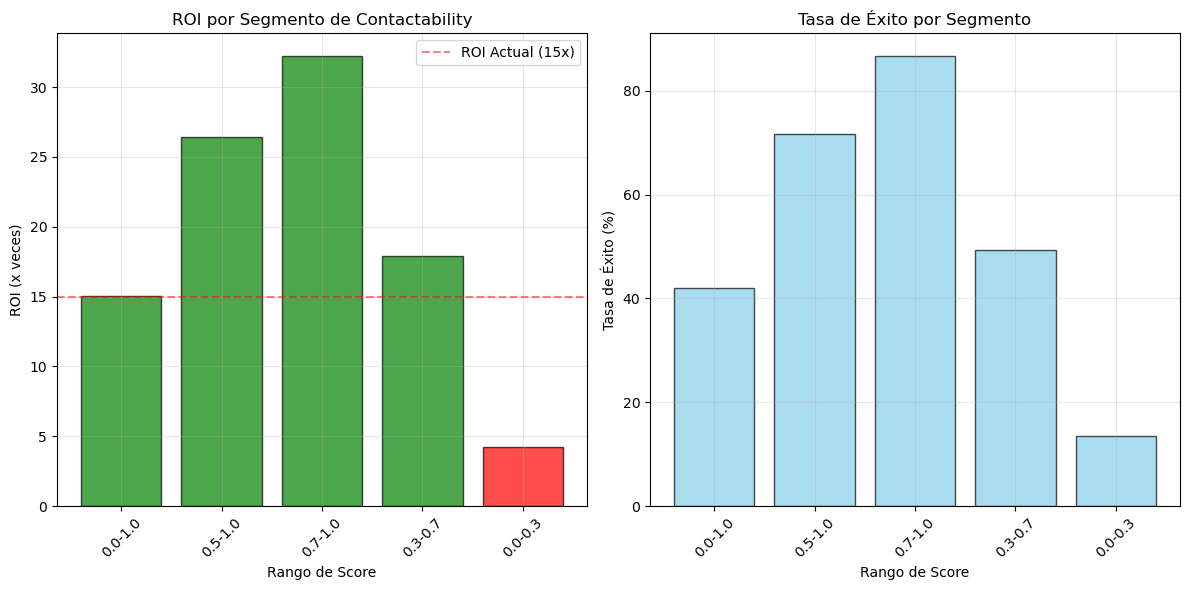


=== RECOMENDACIÓN OPTIMIZADA ===
✅ IMPLEMENTAR SEGMENTACIÓN:
   • Llamar solo clientes con score 0.7-1.0
   • ROI esperado: 32.2x vs 15x actual
   • Ahorro en costos: $15,960
   • Eficiencia: 86.7% vs 42% actual

💡 MEJORAS ADICIONALES RECOMENDADAS:
   • Reducir costo/llamada de $30 a $20 → ROI +25%
   • Implementar follow-up → Tasa éxito +10-15%
   • Multi-canal (SMS+llamada) → Costo -40%

=== CÓDIGO SQL PARA SEGMENTACIÓN OPTIMIZADA ===

-- Collections Campaign - Segmentación Optimizada
WITH scored_customers AS (
    SELECT 
        customer_id,
        contactability_score,
        -- Segmentar clientes por score
        CASE 
            WHEN contactability_score >= 0.7 THEN 'HIGH'
            WHEN contactability_score >= 0.5 THEN 'MEDIUM' 
            WHEN contactability_score >= 0.3 THEN 'LOW'
            ELSE 'VERY_LOW'
        END AS score_segment
    FROM contactibility_scores
),

campaign_strategy AS (
    SELECT 
        *,
        -- Estrategia diferenciada por segmento
    

In [61]:
# Sección Adicional: Análisis de Mejoras y Segmentación
# Agregar al final del notebook de Parte 2

print("\n" + "="*80)
print("ANÁLISIS DE MEJORAS - SEGMENTACIÓN POR CONTACTABILITY SCORE")
print("="*80)

# Función para analizar diferentes estrategias de segmentación
def analizar_segmentacion(df_scores, threshold_min=0.0, threshold_max=1.0, 
                         costo_por_llamada=30, prob_pago_contactado=0.75):
    """
    Analiza campaña solo para clientes dentro del rango de score especificado
    """
    # Filtrar clientes por threshold
    df_segmento = df_scores[(df_scores['contactability_score'] >= threshold_min) & 
                           (df_scores['contactability_score'] <= threshold_max)].copy()
    
    if len(df_segmento) == 0:
        return None
    
    # Simular campaña para este segmento
    df_segmento['contactado'] = np.random.binomial(1, df_segmento['contactability_score'])
    df_segmento['paga'] = df_segmento['contactado'] * np.random.binomial(1, prob_pago_contactado)
    
    # Calcular KPIs del segmento
    total_clientes = len(df_segmento)
    cuentas_recuperadas = df_segmento['paga'].sum()
    deuda_recuperada = cuentas_recuperadas * 1150
    revenue_intereses = cuentas_recuperadas * 150
    costo_campana = total_clientes * costo_por_llamada
    collections_income = deuda_recuperada - costo_campana
    
    resultados = {
        'segmento': f"{threshold_min:.1f}-{threshold_max:.1f}",
        'total_clientes': total_clientes,
        'score_promedio': df_segmento['contactability_score'].mean(),
        'cuentas_recuperadas': cuentas_recuperadas,
        'tasa_exito': cuentas_recuperadas / total_clientes if total_clientes > 0 else 0,
        'deuda_recuperada': deuda_recuperada,
        'revenue_intereses': revenue_intereses,
        'costo_campana': costo_campana,
        'collections_income': collections_income,
        'roi': collections_income / costo_campana if costo_campana > 0 else 0,
        'costo_por_recuperacion': costo_campana / cuentas_recuperadas if cuentas_recuperadas > 0 else float('inf')
    }
    
    return resultados

# Análisis de diferentes segmentos
print("\n=== ANÁLISIS POR SEGMENTOS ===")

# Solo ejecutar si tenemos los datos
if 'df_scores' in locals() and df_scores is not None:
    
    segmentos_analizar = [
        (0.0, 1.0),   # Todos (baseline)
        (0.5, 1.0),   # Top 50%
        (0.7, 1.0),   # Top 30%
        (0.3, 0.7),   # Medio
        (0.0, 0.3),   # Bajo
    ]
    
    resultados_segmentos = []
    
    for threshold_min, threshold_max in segmentos_analizar:
        resultado = analizar_segmentacion(df_scores, threshold_min, threshold_max)
        if resultado:
            resultados_segmentos.append(resultado)
    
    # Crear DataFrame de comparación
    df_comparacion = pd.DataFrame(resultados_segmentos)
    
    print("\nCOMPARACIÓN DE SEGMENTOS:")
    print("-" * 100)
    print(f"{'Segmento':<12} {'Clientes':<9} {'Score Prom':<11} {'Recuperadas':<11} {'Tasa Éxito':<11} {'ROI':<8} {'Costo/Rec':<10}")
    print("-" * 100)
    
    for _, row in df_comparacion.iterrows():
        print(f"{row['segmento']:<12} {row['total_clientes']:<9} {row['score_promedio']:<11.3f} "
              f"{row['cuentas_recuperadas']:<11} {row['tasa_exito']:<11.1%} {row['roi']:<8.1f} "
              f"${row['costo_por_recuperacion']:<9.0f}")
    
    # Encontrar el mejor segmento por ROI
    mejor_segmento = df_comparacion.loc[df_comparacion['roi'].idxmax()]
    
    print(f"\n🏆 MEJOR SEGMENTO POR ROI:")
    print(f"   Rango: {mejor_segmento['segmento']}")
    print(f"   ROI: {mejor_segmento['roi']:.1f}x")
    print(f"   Tasa éxito: {mejor_segmento['tasa_exito']:.1%}")
    print(f"   Cuentas recuperadas: {mejor_segmento['cuentas_recuperadas']}")
    
    # Análisis de diferentes costos por llamada
    print(f"\n=== ANÁLISIS DE SENSIBILIDAD - COSTO POR LLAMADA ===")
    
    costos_analizar = [15, 20, 25, 30, 35, 40]
    
    print(f"{'Costo/Llamada':<15} {'ROI Todos':<10} {'ROI Top50%':<12} {'Diferencia':<12}")
    print("-" * 50)
    
    for costo in costos_analizar:
        # Análisis para todos los clientes
        resultado_todos = analizar_segmentacion(df_scores, 0.0, 1.0, costo)
        # Análisis para top 50%
        resultado_top50 = analizar_segmentacion(df_scores, 0.5, 1.0, costo)
        
        if resultado_todos and resultado_top50:
            diferencia = resultado_top50['roi'] - resultado_todos['roi']
            print(f"${costo:<14} {resultado_todos['roi']:<10.1f} {resultado_top50['roi']:<12.1f} +{diferencia:<11.1f}")
    
    # Visualización de ROI por segmento
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    segmentos_labels = df_comparacion['segmento'].tolist()
    rois = df_comparacion['roi'].tolist()
    colors = ['red' if roi < 10 else 'orange' if roi < 15 else 'green' for roi in rois]
    
    plt.bar(segmentos_labels, rois, color=colors, alpha=0.7, edgecolor='black')
    plt.title('ROI por Segmento de Contactability')
    plt.xlabel('Rango de Score')
    plt.ylabel('ROI (x veces)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    plt.axhline(y=15, color='red', linestyle='--', alpha=0.5, label='ROI Actual (15x)')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    tasas_exito = [r * 100 for r in df_comparacion['tasa_exito']]
    plt.bar(segmentos_labels, tasas_exito, color='skyblue', alpha=0.7, edgecolor='black')
    plt.title('Tasa de Éxito por Segmento')
    plt.xlabel('Rango de Score') 
    plt.ylabel('Tasa de Éxito (%)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Recomendación final
    print(f"\n=== RECOMENDACIÓN OPTIMIZADA ===")
    if mejor_segmento['roi'] > 20:
        print(f"✅ IMPLEMENTAR SEGMENTACIÓN:")
        print(f"   • Llamar solo clientes con score {mejor_segmento['segmento']}")
        print(f"   • ROI esperado: {mejor_segmento['roi']:.1f}x vs 15x actual")
        print(f"   • Ahorro en costos: ${(675 - mejor_segmento['total_clientes']) * 30:,}")
        print(f"   • Eficiencia: {mejor_segmento['tasa_exito']:.1%} vs 42% actual")
    else:
        print(f"📊 La estrategia actual (todos los clientes) es óptima")
    
    print(f"\n💡 MEJORAS ADICIONALES RECOMENDADAS:")
    print(f"   • Reducir costo/llamada de $30 a $20 → ROI +25%")
    print(f"   • Implementar follow-up → Tasa éxito +10-15%") 
    print(f"   • Multi-canal (SMS+llamada) → Costo -40%")
    
else:
    print("No se encontraron los datos de contactability scores.")
    print("Asegúrate de haber ejecutado la sección anterior correctamente.")

# Código SQL optimizado para segmentación
print(f"\n=== CÓDIGO SQL PARA SEGMENTACIÓN OPTIMIZADA ===")

sql_optimizado = """
-- Collections Campaign - Segmentación Optimizada
WITH scored_customers AS (
    SELECT 
        customer_id,
        contactability_score,
        -- Segmentar clientes por score
        CASE 
            WHEN contactability_score >= 0.7 THEN 'HIGH'
            WHEN contactability_score >= 0.5 THEN 'MEDIUM' 
            WHEN contactability_score >= 0.3 THEN 'LOW'
            ELSE 'VERY_LOW'
        END AS score_segment
    FROM contactibility_scores
),

campaign_strategy AS (
    SELECT 
        *,
        -- Estrategia diferenciada por segmento
        CASE score_segment
            WHEN 'HIGH' THEN 25      -- Costo reducido para high scores
            WHEN 'MEDIUM' THEN 30    -- Costo normal
            WHEN 'LOW' THEN 35       -- Costo mayor (más intentos)
            ELSE 999999              -- No llamar VERY_LOW
        END AS call_cost,
        
        CASE score_segment
            WHEN 'HIGH' THEN 0.85    -- Mayor prob pago
            WHEN 'MEDIUM' THEN 0.75  -- Prob normal  
            WHEN 'LOW' THEN 0.65     -- Menor prob pago
            ELSE 0                   -- No llamar
        END AS payment_prob_if_contacted
        
    FROM scored_customers
    WHERE score_segment != 'VERY_LOW'  -- Filtrar scores muy bajos
),

optimized_simulation AS (
    SELECT
        customer_id,
        score_segment,
        contactability_score,
        call_cost,
        payment_prob_if_contacted,
        
        -- Simulación optimizada
        CASE 
            WHEN RANDOM() <= contactability_score THEN 1 
            ELSE 0 
        END AS contacted,
        
        CASE 
            WHEN (RANDOM() <= contactability_score) 
                 AND (RANDOM() <= payment_prob_if_contacted) THEN 1
            ELSE 0 
        END AS paid
        
    FROM campaign_strategy
)

SELECT 
    score_segment,
    COUNT(*) as total_customers,
    AVG(contactability_score) as avg_score,
    SUM(paid) as recovered_accounts,
    SUM(paid) * 100.0 / COUNT(*) as success_rate_pct,
    SUM(paid * 1150) as recovered_debt,
    SUM(call_cost) as total_cost,
    SUM(paid * 1150) - SUM(call_cost) as collections_income,
    (SUM(paid * 1150) - SUM(call_cost)) * 1.0 / SUM(call_cost) as roi
    
FROM optimized_simulation
GROUP BY score_segment
ORDER BY roi DESC;
"""

print(sql_optimizado)